### In this file, I have done categorical embedding, one hot encoding and standardization. I have also done quantile clipping for a few extreme values of yield at the right end of the data.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder


import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/datasets/final_train_data_32bit/final_train_data_32bit.csv')

In [ ]:
test = pd.read_csv('/datasets/final_test_data_32bit/final_test_data_32bit.csv')

In [ ]:
train.head()

,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,date,hour
0,fid_110884,ing_w,0.00,690.4551,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,1.4,0.0,1,1,0
1,fid_92885,ing_w,95.64,9188.1060,Obery Farms,location 5290,10.0,8.0,350.0,2.2,1021.1,0.7,4.1,1,1,0
2,fid_97108,ing_w,214.64,7900.3784,Obery Farms,location 5290,10.0,8.0,350.0,2.2,1021.1,0.7,4.1,1,1,0
3,fid_52171,ing_w,57.77,6466.0490,Obery Farms,location 5290,10.0,8.0,350.0,2.2,1021.1,0.7,4.1,1,1,0
4,fid_120541,ing_w,27.84,6187.3400,Obery Farms,location 5290,10.0,8.0,350.0,2.2,1021.1,0.7,4.1,1,1,0


In [ ]:
test.head()

,timestamp,farm_id,ingredient_type,id,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,date,hour
0,2017-01-01 00:00:00,fid_110884,ing_w,0,690.4551,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,1.1,3.6,1,1,0
1,2017-01-01 00:00:00,fid_71637,ing_x,41580244,16509.6050,Dole Food Company,location 8421,21.8,1.0,126.0,14.0,1023.2,0.7,2.2,1,1,0
2,2017-01-01 00:00:00,fid_71637,ing_w,41580243,16509.6050,Dole Food Company,location 8421,21.8,1.0,126.0,14.0,1023.2,0.7,2.2,1,1,0
3,2017-01-01 00:00:00,fid_27536,ing_x,41580242,16890.2300,Wayne Farms,location 8421,21.8,1.0,126.0,14.0,1023.2,0.7,2.2,1,1,0
4,2017-01-01 00:00:00,fid_27536,ing_w,41580241,16890.2300,Wayne Farms,location 8421,21.8,1.0,126.0,14.0,1023.2,0.7,2.2,1,1,0


In [ ]:
test.drop(['timestamp'], axis = 1, inplace = True)

In [ ]:
test.sort_values(by= ['id'], inplace=True)
test.reset_index(drop=True, inplace = True)

In [ ]:
test.head()

,farm_id,ingredient_type,id,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,date,hour
0,fid_110884,ing_w,0,690.45510,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,1.1,3.6,1,1,0
1,fid_90053,ing_w,1,252.69617,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,1.1,3.6,1,1,0
2,fid_17537,ing_w,2,499.44653,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,1.1,3.6,1,1,0
3,fid_110392,ing_w,3,2200.40750,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,1.1,3.6,1,1,0
4,fid_62402,ing_w,4,10833.14000,Obery Farms,location 7369,17.8,4.0,100.0,11.7,1021.4,1.1,3.6,1,1,0


In [ ]:
print(train.shape)
print(test.shape)

(20511298, 16)
(21251760, 16)


In [ ]:
train.dtypes

farm_id                   object
ingredient_type           object
yield                    float64
farm_area                float64
farming_company           object
deidentified_location     object
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
month                      int64
date                       int64
hour                       int64
dtype: object

In [ ]:
test.dtypes

farm_id                   object
ingredient_type           object
id                         int64
farm_area                float64
farming_company           object
deidentified_location     object
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
month                      int64
date                       int64
hour                       int64
dtype: object

#### Changing the data types according to the type of column.

In [ ]:
cat_cols = list(train.select_dtypes(['object']).columns)
print(cat_cols)
train[cat_cols] = train[cat_cols].astype('category')
test[cat_cols] = test[cat_cols].astype('category')

['farm_id', 'ingredient_type', 'farming_company', 'deidentified_location']


In [ ]:
int_cols = list(train.select_dtypes('int64').columns)
print(int_cols)

['month', 'date', 'hour']


In [ ]:
train[int_cols] = train[int_cols].astype('category')
test[int_cols] = test[int_cols].astype('category')

In [ ]:
train['cloudiness'] = train['cloudiness'].astype('category')
test['cloudiness'] = test['cloudiness'].astype('category')

In [ ]:
del int_cols, cat_cols

In [ ]:
train.dtypes

farm_id                  category
ingredient_type          category
yield                     float64
farm_area                 float64
farming_company          category
deidentified_location    category
temp_obs                  float64
cloudiness               category
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
precipitation             float64
wind_speed                float64
month                    category
date                     category
hour                     category
dtype: object

In [ ]:
test.dtypes

farm_id                  category
ingredient_type          category
id                          int64
farm_area                 float64
farming_company          category
deidentified_location    category
temp_obs                  float64
cloudiness               category
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
precipitation             float64
wind_speed                float64
month                    category
date                     category
hour                     category
dtype: object

#### Checking the values at different quantiles to understand the distribultion of the data

In [ ]:
train.describe([0.00, 0.0000001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.99, 0.99999999, 1.00])

,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,2.051130e+07,2.051130e+07,2.051130e+07,2.051130e+07,2.051130e+07,2.051130e+07,2.051130e+07,2.051130e+07
mean,2.093090e+03,9.944797e+03,1.597565e+01,1.709179e+02,7.741341e+00,1.013096e+03,1.265671e+00,3.382184e+00
std,1.521292e+05,1.085633e+04,1.093921e+01,1.106991e+02,1.016617e+01,1.671186e+01,6.945490e+00,2.265845e+00
min,0.000000e+00,2.629155e+01,-2.890000e+01,0.000000e+00,-3.500000e+01,9.385000e+02,-1.000000e+00,0.000000e+00
0%,0.000000e+00,2.629155e+01,-2.890000e+01,0.000000e+00,-3.500000e+01,9.385000e+02,-1.000000e+00,0.000000e+00
1e-05%,0.000000e+00,2.629155e+01,-2.890000e+01,0.000000e+00,-3.500000e+01,9.385000e+02,-1.000000e+00,0.000000e+00
10%,3.275000e-01,1.176152e+03,1.100000e+00,0.000000e+00,-5.600000e+00,1.005800e+03,0.000000e+00,0.000000e+00
20%,1.085000e+01,2.289409e+03,6.700000e+00,6.000000e+01,-1.100000e+00,1.009800e+03,0.000000e+00,1.500000e+00
30%,2.599000e+01,3.683511e+03,1.060000e+01,1.100000e+02,2.000000e+00,1.012100e+03,0.000000e+00,2.100000e+00
40%,4.672500e+01,5.157603e+03,1.390000e+01,1.400000e+02,5.400000e+00,1.014100e+03,0.000000e+00,2.600000e+00


In [ ]:
train.quantile([0, 0.01, 0.05, 0.075, 0.092495, 0.1, 0.2]).T

,0.000000,0.010000,0.050000,0.075000,0.092495,0.100000,0.200000
yield,0.00000,0.00000,0.00000,0.00000,0.0001,0.3275,10.8500
farm_area,26.29155,172.61377,677.44867,911.93585,1082.4128,1176.1520,2289.4087
temp_obs,-28.90000,-11.70000,-2.80000,-0.60000,0.6000,1.1000,6.7000
wind_direction,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,60.0000
dew_temp,-35.00000,-18.30000,-9.40000,-7.20000,-6.1000,-5.6000,-1.1000
pressure_sea_level,938.50000,938.50000,999.10000,1003.80000,1005.2000,1005.8000,1009.8000
precipitation,-1.00000,-1.00000,-1.00000,0.00000,0.0000,0.0000,0.0000
wind_speed,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,1.5000


#### More than 9% of the data is 0, so they are not outliers.

In [ ]:
train[['yield']].quantile([0.998, 0.9983219, 0.999, 0.9995, 0.9997, 1]).T

,0.998000,0.998322,0.999000,0.999500,0.999700,1.000000
yield,20718.8,25000.0,38330.9856,58500.0,91125.0,21904700.0


#### Checking the boxplot wisker values.

In [ ]:
#q3 + 1.5(q3-q1)
print(train['yield'].quantile(0.75) + 1.5*(train['yield'].quantile(0.75) - train['yield'].quantile(0.25)))
#q1 - 1.5(q3-q1)
print(train['yield'].quantile(0.25) - 1.5*(train['yield'].quantile(0.75) - train['yield'].quantile(0.25)))

636.9875
-353.31249999999994


<AxesSubplot:xlabel='yield'>

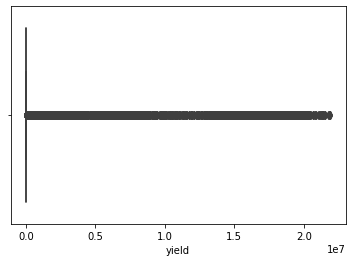

In [ ]:
sns.boxplot(train['yield'])

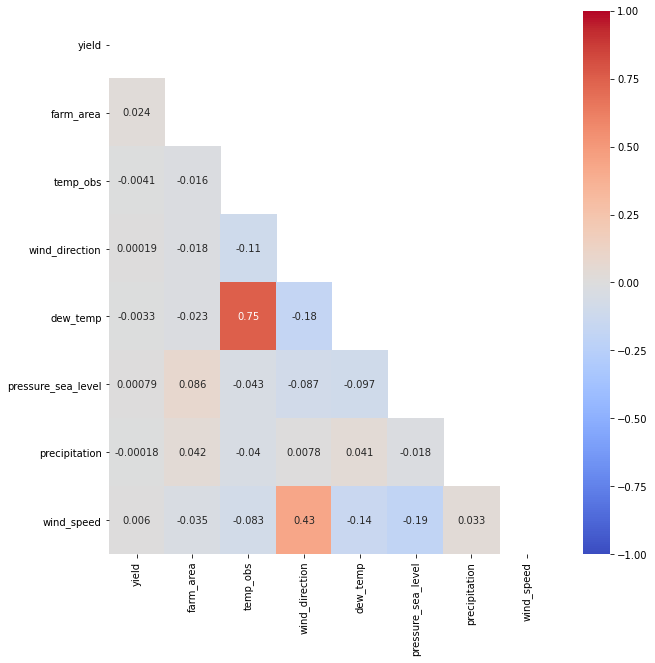

In [ ]:
cm = train.corr()
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(cm,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

### The corr plot shows there wasn't much linearity between the features and also with the label.

### I have considered <font color = 'orange'>25000</font> for quantile clipping after trial and error, I have tried with 10,00,000, 1,00,000 and 75,000 also, due to lack of computational power, I wasn't able to explore with other values.

In [ ]:
train.loc[train['yield'] > train['yield'].quantile(q = 0.9983219), ['yield']] = train['yield'].quantile(q = 0.9983219)

# I have replace yield of 34,420 observations with 25000, which is at quantile 0.9983219.
# These observations accounts for only 0.168% of the total observations

<AxesSubplot:xlabel='yield'>

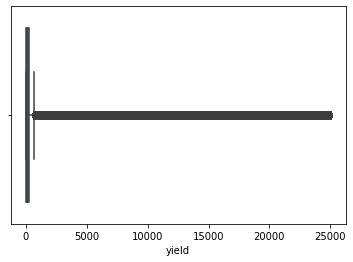

In [ ]:
sns.boxplot(train['yield'])

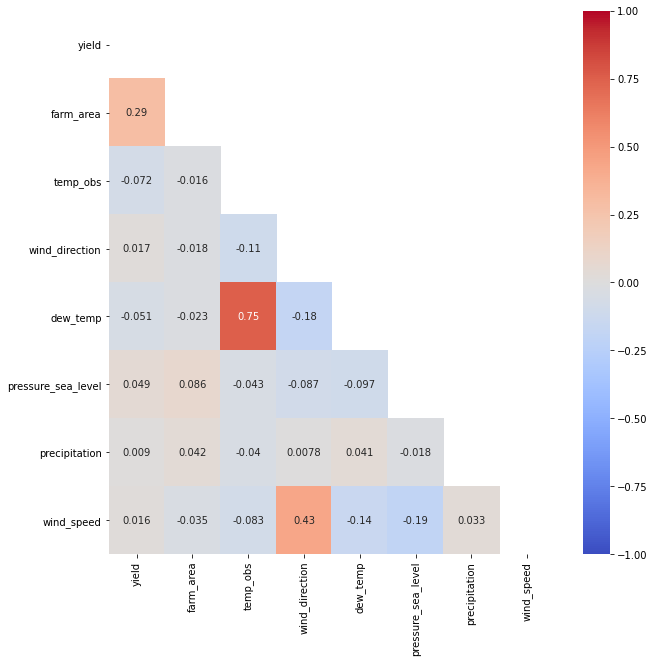

In [ ]:
cm = train.corr()
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(cm,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

#### We can see that the linearity between the target and the features has increased.

In [ ]:
train[['yield']].quantile([0.997,0.998,0.9999, 1]).T

,0.9970,0.9980,0.9999,1.0000
yield,14468.8,20718.8,25000.0,25000.0


### Splitting the data using sklearn train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test = train_test_split(train, test_size = 0.25, random_state = 340, shuffle = True)

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (15383473, 16)
X_test shape: (5127825, 16)


In [ ]:
X_train.head()

,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,date,hour
18486584,fid_35840,ing_w,54.800,9262.4290,Obery Farms,location 5290,9.4,4.0,10.0,5.0,1021.7,0.0,5.7,11,26,7
12847209,fid_46695,ing_w,114.100,10126.4270,Obery Farms,location 5290,32.2,4.0,30.0,16.7,1014.0,0.0,3.6,8,19,19
7498634,fid_65705,ing_w,47.420,1994.8132,Del Monte Foods,location 5290,13.3,4.0,360.0,8.9,1024.7,5.0,3.6,5,17,13
14045724,fid_14324,ing_w,66.060,3765.4514,Sanderson Farms,location 5489,37.8,4.0,280.0,13.3,1010.2,0.0,6.2,9,9,20
16944984,fid_31537,ing_x,229.299,32129.2950,Del Monte Foods,location 5489,25.6,2.0,140.0,8.3,1012.7,0.0,1.5,10,30,7


In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [ ]:
X_train.head()

,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,date,hour
0,fid_35840,ing_w,54.800,9262.4290,Obery Farms,location 5290,9.4,4.0,10.0,5.0,1021.7,0.0,5.7,11,26,7
1,fid_46695,ing_w,114.100,10126.4270,Obery Farms,location 5290,32.2,4.0,30.0,16.7,1014.0,0.0,3.6,8,19,19
2,fid_65705,ing_w,47.420,1994.8132,Del Monte Foods,location 5290,13.3,4.0,360.0,8.9,1024.7,5.0,3.6,5,17,13
3,fid_14324,ing_w,66.060,3765.4514,Sanderson Farms,location 5489,37.8,4.0,280.0,13.3,1010.2,0.0,6.2,9,9,20
4,fid_31537,ing_x,229.299,32129.2950,Del Monte Foods,location 5489,25.6,2.0,140.0,8.3,1012.7,0.0,1.5,10,30,7


In [ ]:
X_test.head()

,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,date,hour
0,fid_115088,ing_w,61.720,4274.1885,Del Monte Foods,location 5290,11.7,4.0,160.0,2.8,1018.6,0.0,2.1,11,14,17
1,fid_71750,ing_x,0.000,11419.8220,Wayne Farms,location 2532,10.6,4.0,130.0,0.6,1020.5,0.0,2.6,3,29,2
2,fid_35840,ing_w,154.390,9262.4290,Obery Farms,location 5290,32.2,6.0,240.0,12.2,1024.9,0.0,4.6,6,19,21
3,fid_83468,ing_z,341.676,17357.9960,Obery Farms,location 1784,-0.6,0.0,210.0,-1.7,1012.5,0.0,4.6,1,31,0
4,fid_66062,ing_w,0.007,2992.0340,Obery Farms,location 959,17.6,0.0,350.0,11.4,1019.3,1.3,2.1,9,20,18


In [ ]:
X_train.dtypes

farm_id                  category
ingredient_type          category
yield                     float64
farm_area                 float64
farming_company          category
deidentified_location    category
temp_obs                  float64
cloudiness               category
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
precipitation             float64
wind_speed                float64
month                    category
date                     category
hour                     category
dtype: object

### Label Encoding and Using Neural Network for Categorical Embedding

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, Embedding, concatenate, Flatten, Reshape
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
np.random.seed(340)
tf.random.set_seed(340)

# setting seed to get the same output whenever we run it

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_cols = list(X_train.select_dtypes('category').columns)
cat_cols

['farm_id',
 'ingredient_type',
 'farming_company',
 'deidentified_location',
 'cloudiness',
 'month',
 'date',
 'hour']

In [ ]:
cat_cols.pop(1)
# Pop removes the item from the list, based on index mentioned (default index is -1)

'ingredient_type'

In [ ]:
cat_cols.pop(-3)

In [ ]:
print(cat_cols)

['farm_id', 'farming_company', 'deidentified_location', 'cloudiness', 'date', 'hour']


In [ ]:
le_dict= {}
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    test[col] = le.transform(test[col])
  #Save a mapping of categorical columns values and its transforamtion - needed 
  #later on for mapping purposes
    le_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
X_train.head()

,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,date,hour
0,614,ing_w,54.800,9262.4290,8,4,9.4,4,10.0,5.0,1021.7,0.0,5.7,11,25,7
1,768,ing_w,114.100,10126.4270,8,4,32.2,4,30.0,16.7,1014.0,0.0,3.6,8,18,19
2,1022,ing_w,47.420,1994.8132,0,4,13.3,4,360.0,8.9,1024.7,5.0,3.6,5,16,13
3,327,ing_w,66.060,3765.4514,11,6,37.8,4,280.0,13.3,1010.2,0.0,6.2,9,8,20
4,562,ing_x,229.299,32129.2950,0,6,25.6,2,140.0,8.3,1012.7,0.0,1.5,10,29,7


In [ ]:
X_test.head()

,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,date,hour
0,194,ing_w,61.720,4274.1885,0,4,11.7,4,160.0,2.8,1018.6,0.0,2.1,11,13,17
1,1096,ing_x,0.000,11419.8220,14,1,10.6,4,130.0,0.6,1020.5,0.0,2.6,3,28,2
2,614,ing_w,154.390,9262.4290,8,4,32.2,6,240.0,12.2,1024.9,0.0,4.6,6,18,21
3,1238,ing_z,341.676,17357.9960,8,0,-0.6,0,210.0,-1.7,1012.5,0.0,4.6,1,30,0
4,1025,ing_w,0.007,2992.0340,8,15,17.6,0,350.0,11.4,1019.3,1.3,2.1,9,19,18


In [ ]:
test.head()

,farm_id,ingredient_type,id,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,date,hour
0,142,ing_w,0,690.45510,8,12,17.8,4,100.0,11.7,1021.4,1.1,3.6,1,0,0
1,1307,ing_w,1,252.69617,8,12,17.8,4,100.0,11.7,1021.4,1.1,3.6,1,0,0
2,376,ing_w,2,499.44653,8,12,17.8,4,100.0,11.7,1021.4,1.1,3.6,1,0,0
3,134,ing_w,3,2200.40750,8,12,17.8,4,100.0,11.7,1021.4,1.1,3.6,1,0,0
4,986,ing_w,4,10833.14000,8,12,17.8,4,100.0,11.7,1021.4,1.1,3.6,1,0,0


In [ ]:
input_df_list = []
for x in list(cat_cols):
    input_df_list.append(X_train[x].values)

In [ ]:
input_df_list

[array([ 614,  768, 1022, ..., 1216,  327,   52]),
 array([ 8,  8,  0, ...,  1, 11,  8]),
 array([ 4,  4,  4, ..., 15,  6, 13]),
 array([4, 4, 4, ..., 0, 2, 2]),
 array([25, 18, 16, ..., 16, 17, 13]),
 array([ 7, 19, 13, ..., 18,  0,  9])]

In [ ]:
target = X_train['yield'].values

In [ ]:
input_models = []

output_embeddings = []

embed_size = [4, 2, 2, 2, 2, 2]

for x in range(len(cat_cols)):
    cat_embed_name = cat_cols[x] + '_embedding'
    no_of_unique_cat = X_train[cat_cols[x]].nunique()
    embedding_size = embed_size[x]
    input_model = Input(shape=(1,), name = cat_cols[x] + '_input')
    embed = Embedding(input_dim = no_of_unique_cat,output_dim = embedding_size, name = cat_embed_name)(input_model)
    output_model = Reshape(target_shape = (embedding_size,))(embed)
    
    input_models.append(input_model)
    output_embeddings.append(output_model)

In [ ]:
input_models

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'farm_id_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'farming_company_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'deidentified_location_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'cloudiness_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'date_input')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'hour_input')>]

In [ ]:
output_embeddings

[<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'reshape')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'reshape_1')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'reshape_2')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'reshape_3')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'reshape_4')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'reshape_5')>]

In [ ]:
embed_layer = concatenate(output_embeddings)
x = Dense(128, kernel_initializer='glorot_normal', activation = 'relu')(embed_layer)

x = Dense(64, kernel_initializer='glorot_normal', activation = 'relu')(x)

x = Dense(32, kernel_initializer='glorot_normal', activation = 'relu')(x)

x = Dense(16, kernel_initializer='glorot_normal', activation = 'relu')(x)

x = Dense(8, kernel_initializer='glorot_normal', activation = 'relu')(x)

output = Dense(1, activation='linear')(x)

In [ ]:
model = Model(inputs = input_models,outputs = output)
model.compile(loss=tf.keras.losses.MeanSquaredError(name='MSE'), \
   optimizer= tf.keras.optimizers.Adam(),\
   metrics=['mse'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
farm_id_input (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
farming_company_input (InputLay [(None, 1)]          0                                            
__________________________________________________________________________________________________
deidentified_location_input (In [(None, 1)]          0                                            
__________________________________________________________________________________________________
cloudiness_input (InputLayer)   [(None, 1)]          0                                            
______________________________________________________________________________________________

In [ ]:
history  =  model.fit(input_df_list, target, validation_split=0.2,\
                      epochs = 5, batch_size =64, verbose= 2,shuffle=True)

Epoch 1/5
192294/192294 - 274s - loss: 1533976.0000 - mse: 1533976.0000 - val_loss: 1526822.2500 - val_mse: 1526822.2500
Epoch 2/5
192294/192294 - 304s - loss: 1521100.2500 - mse: 1521100.2500 - val_loss: 1514936.7500 - val_mse: 1514936.7500
Epoch 3/5
192294/192294 - 304s - loss: 1517769.3750 - mse: 1517769.3750 - val_loss: 1526524.3750 - val_mse: 1526524.3750
Epoch 4/5
192294/192294 - 242s - loss: 1516298.2500 - mse: 1516298.2500 - val_loss: 1511488.2500 - val_mse: 1511488.2500
Epoch 5/5
192294/192294 - 306s - loss: 1515592.8750 - mse: 1515592.8750 - val_loss: 1512488.8750 - val_mse: 1512488.8750


#### I tried to work with 10 epochs, but I was getting memory error, so had to go with 5 epochs.

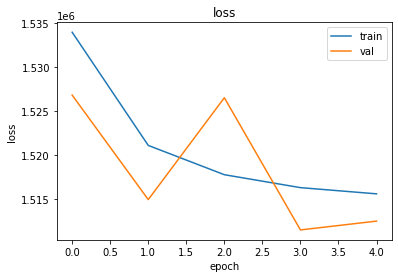

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Extracting the Embeddings

In [ ]:
print(model.get_layer('farm_id_embedding').get_weights()[0][0])
print(model.get_layer('farm_id_embedding').get_weights()[0].shape)

[ 1.53959   -2.7753088 -4.715194  -1.8464664]
(1434, 4)


In [ ]:
farm_id_embeddings = {ind: model.get_layer('farm_id_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['farm_id'].items()}
farm_id_df = pd.DataFrame(farm_id_embeddings)
farm_id_df = farm_id_df.T.reset_index()
farm_id_df = farm_id_df.rename(columns = {'index': 'index_farm_id', 0: 'fid1',1: 'fid2',2: 'fid3', 3: 'fid4'})
farm_id_df.head()

,index_farm_id,fid1,fid2,fid3,fid4
0,0,1.539590,-2.775309,-4.715194,-1.846466
1,1,-1.101420,0.527143,-1.808616,-1.786329
2,2,2.228436,-3.284953,-2.570286,-1.566394
3,3,1.134176,-3.957372,-1.400346,-1.119093
4,4,1.105144,-2.983119,-5.092150,-1.633686


In [ ]:
print(model.get_layer('farming_company_embedding').get_weights()[0][0])
print(model.get_layer('farming_company_embedding').get_weights()[0].shape)

[-0.07146344  0.14343978]
(16, 2)


In [ ]:
farming_company_embeddings = {ind: model.get_layer('farming_company_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['farming_company'].items()}
farming_company_df = pd.DataFrame(farming_company_embeddings)
farming_company_df = farming_company_df.T.reset_index()
farming_company_df = farming_company_df.rename(columns = {'index': 'index_farming_company', 0: 'fc1',1: 'fc2'})
farming_company_df.head()

,index_farming_company,fc1,fc2
0,0,-0.071463,0.143440
1,1,0.240481,0.582115
2,2,-1.042950,0.672630
3,3,1.269737,0.120923
4,4,-0.499616,-0.458114


In [ ]:
print(model.get_layer('deidentified_location_embedding').get_weights()[0][0])
print(model.get_layer('deidentified_location_embedding').get_weights()[0].shape)

[-0.23310038  1.3137472 ]
(16, 2)


In [ ]:
deidentified_location_embeddings = {ind: model.get_layer('deidentified_location_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['deidentified_location'].items()}
deidentified_location_df = pd.DataFrame(deidentified_location_embeddings)
deidentified_location_df = deidentified_location_df.T.reset_index()
deidentified_location_df = deidentified_location_df.rename(columns = {'index': 'index_deidentified_location', 0: 'Loc1',\
                                1: 'Loc2'})
deidentified_location_df.head()

,index_deidentified_location,Loc1,Loc2
0,0,-0.233100,1.313747
1,1,0.412718,-0.340595
2,2,-2.393455,-0.763309
3,3,-2.346248,1.197125
4,4,-0.095740,-0.074135


In [ ]:
print(model.get_layer('cloudiness_embedding').get_weights()[0][0])
print(model.get_layer('cloudiness_embedding').get_weights()[0].shape)

[-1.071276  -1.0299156]
(10, 2)


In [ ]:
cloudiness_embeddings = {ind: model.get_layer('cloudiness_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['cloudiness'].items()}
cloudiness_df = pd.DataFrame(cloudiness_embeddings)
cloudiness_df = cloudiness_df.T.reset_index()
cloudiness_df = cloudiness_df.rename(columns = {'index': 'index_cloudiness', 0: 'cloud1',1: 'cloud2'})
cloudiness_df.head()

,index_cloudiness,cloud1,cloud2
0,0,-1.071276,-1.029916
1,1,-1.866369,-1.708696
2,2,0.004623,-1.441128
3,3,-0.023402,0.052325
4,4,0.137343,-1.655584


In [ ]:
print(model.get_layer('date_embedding').get_weights()[0][0])
print(model.get_layer('date_embedding').get_weights()[0].shape)

[-1.4550078  1.9890742]
(31, 2)


In [ ]:
date_embeddings = {ind: model.get_layer('date_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['date'].items()}
date_df = pd.DataFrame(date_embeddings)
date_df = date_df.T.reset_index()
date_df = date_df.rename(columns = {'index': 'index_date', 0: 'date1',1: 'date2'})
date_df.head()

,index_date,date1,date2
0,0,-1.455008,1.989074
1,1,-1.468598,2.086351
2,2,-1.501892,2.126145
3,3,-0.358343,1.872624
4,4,-1.339306,2.079918


In [ ]:
print(model.get_layer('hour_embedding').get_weights()[0][0])
print(model.get_layer('hour_embedding').get_weights()[0].shape)

[-2.8042405 -0.3796552]
(24, 2)


In [ ]:
hour_embeddings = {ind: model.get_layer('hour_embedding').get_weights()[0][ind]\
                     for w, ind in le_dict['hour'].items()}
hour_df = pd.DataFrame(hour_embeddings)
hour_df = hour_df.T.reset_index()
hour_df = hour_df.rename(columns = {'index': 'index_hour', 0: 'hour1',1: 'hour2'})
hour_df.head()

,index_hour,hour1,hour2
0,0,-2.804240,-0.379655
1,1,-3.006648,-0.451027
2,2,-3.281396,-0.248115
3,3,-2.969496,0.127335
4,4,-2.922580,0.407981


In [ ]:
print(farm_id_df.shape)
print(farming_company_df.shape)
print(deidentified_location_df.shape)
print(cloudiness_df.shape)
print(date_df.shape)
print(hour_df.shape)

(1434, 5)
(16, 3)
(16, 3)
(10, 3)
(31, 3)
(24, 3)


### Concatinating the embeddings to the initial dataframes

In [ ]:
%%time

X_train_new = pd.merge(X_train,farm_id_df,how = 'inner', left_on='farm_id', right_on='index_farm_id')
X_train_new.drop(['farm_id', 'index_farm_id'], axis = 1, inplace = True)


X_train_new = pd.merge(X_train_new,farming_company_df,how = 'inner', left_on='farming_company', right_on='index_farming_company')
X_train_new.drop(['farming_company', 'index_farming_company'], axis = 1, inplace = True)


X_train_new = pd.merge(X_train_new,deidentified_location_df,how = 'inner', left_on='deidentified_location', right_on='index_deidentified_location')
X_train_new.drop(['deidentified_location', 'index_deidentified_location'], axis = 1, inplace = True)


X_train_new = pd.merge(X_train_new,cloudiness_df,how = 'inner', left_on='cloudiness', right_on='index_cloudiness')
X_train_new.drop(['cloudiness', 'index_cloudiness'], axis = 1, inplace = True)


X_train_new = pd.merge(X_train_new, date_df, how = 'inner', left_on='date', right_on='index_date')
X_train_new.drop(['date', 'index_date'], axis = 1, inplace = True)


X_train_new = pd.merge(X_train_new,hour_df,how = 'inner', left_on='hour', right_on='index_hour')
X_train_new.drop(['hour', 'index_hour'], axis = 1, inplace = True)

X_train_new.head()

CPU times: user 29 s, sys: 13.5 s, total: 42.5 s
Wall time: 42.5 s


,ingredient_type,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,...,fc1,fc2,Loc1,Loc2,cloud1,cloud2,date1,date2,hour1,hour2
0,ing_w,54.80,9262.429,9.4,10.0,5.0,1021.7,0.0,5.7,11,...,-0.131761,-0.176664,-0.09574,-0.074135,0.137343,-1.655584,-0.681234,1.855869,-1.633897,0.656381
1,ing_w,178.02,9262.429,26.7,0.0,22.8,1013.2,0.0,0.0,7,...,-0.131761,-0.176664,-0.09574,-0.074135,0.137343,-1.655584,-0.681234,1.855869,-1.633897,0.656381
2,ing_w,167.08,9262.429,18.3,180.0,12.2,1021.2,0.0,3.6,9,...,-0.131761,-0.176664,-0.09574,-0.074135,0.137343,-1.655584,-0.681234,1.855869,-1.633897,0.656381
3,ing_w,73.28,9262.429,8.3,360.0,0.0,1021.4,0.0,6.2,3,...,-0.131761,-0.176664,-0.09574,-0.074135,0.137343,-1.655584,-0.681234,1.855869,-1.633897,0.656381
4,ing_w,92.84,9262.429,1.1,0.0,-3.9,1021.0,0.0,0.0,1,...,-0.131761,-0.176664,-0.09574,-0.074135,0.137343,-1.655584,-0.681234,1.855869,-1.633897,0.656381


In [ ]:
%%time

X_test_new = pd.merge(X_test,farm_id_df,how = 'inner', left_on='farm_id', right_on='index_farm_id')
X_test_new.drop(['farm_id', 'index_farm_id'], axis = 1, inplace = True)


X_test_new = pd.merge(X_test_new,farming_company_df,how = 'inner', left_on='farming_company', right_on='index_farming_company')
X_test_new.drop(['farming_company', 'index_farming_company'], axis = 1, inplace = True)


X_test_new = pd.merge(X_test_new,deidentified_location_df,how = 'inner', left_on='deidentified_location', right_on='index_deidentified_location')
X_test_new.drop(['deidentified_location', 'index_deidentified_location'], axis = 1, inplace = True)


X_test_new = pd.merge(X_test_new,cloudiness_df,how = 'inner', left_on='cloudiness', right_on='index_cloudiness')
X_test_new.drop(['cloudiness', 'index_cloudiness'], axis = 1, inplace = True)


X_test_new = pd.merge(X_test_new, date_df, how = 'inner', left_on='date', right_on='index_date')
X_test_new.drop(['date', 'index_date'], axis = 1, inplace = True)


X_test_new = pd.merge(X_test_new,hour_df,how = 'inner', left_on='hour', right_on='index_hour')
X_test_new.drop(['hour', 'index_hour'], axis = 1, inplace = True)

X_test_new.head()

CPU times: user 8.97 s, sys: 4.65 s, total: 13.6 s
Wall time: 13.6 s


,ingredient_type,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,fid1,fid2,fid3,fid4,fc1,fc2,Loc1,Loc2,cloud1,cloud2,date1,date2,hour1,hour2
0,ing_w,61.72,4274.1885,11.7,160.0,2.8,1018.6,0.0,2.1,11,0.566732,-1.923092,-3.707104,-1.906087,-0.071463,0.14344,-0.09574,-0.074135,0.137343,-1.655584,0.046285,1.379633,-1.146398,-1.005707
1,ing_w,66.98,4274.1885,11.1,30.0,9.4,1014.1,-1.0,4.6,3,0.566732,-1.923092,-3.707104,-1.906087,-0.071463,0.14344,-0.09574,-0.074135,0.137343,-1.655584,0.046285,1.379633,-1.146398,-1.005707
2,ing_w,177.85,4274.1885,36.7,280.0,21.7,1016.8,0.0,4.6,8,0.566732,-1.923092,-3.707104,-1.906087,-0.071463,0.14344,-0.09574,-0.074135,0.137343,-1.655584,0.046285,1.379633,-1.146398,-1.005707
3,ing_w,23.22,1108.7043,36.7,280.0,21.7,1016.8,0.0,4.6,8,3.087548,-7.265269,-2.744137,-1.797623,-0.071463,0.14344,-0.09574,-0.074135,0.137343,-1.655584,0.046285,1.379633,-1.146398,-1.005707
4,ing_w,10.09,1108.7043,11.1,30.0,9.4,1014.1,-1.0,4.6,3,3.087548,-7.265269,-2.744137,-1.797623,-0.071463,0.14344,-0.09574,-0.074135,0.137343,-1.655584,0.046285,1.379633,-1.146398,-1.005707


In [ ]:
%%time

test_new = pd.merge(test, farm_id_df,how = 'inner', left_on='farm_id', right_on='index_farm_id')
test_new.drop(['farm_id', 'index_farm_id'], axis = 1, inplace = True)


test_new = pd.merge(test_new, farming_company_df,how = 'inner', left_on='farming_company', right_on='index_farming_company')
test_new.drop(['farming_company', 'index_farming_company'], axis = 1, inplace = True)


test_new = pd.merge(test_new, deidentified_location_df,how = 'inner', left_on='deidentified_location', right_on='index_deidentified_location')
test_new.drop(['deidentified_location', 'index_deidentified_location'], axis = 1, inplace = True)


test_new = pd.merge(test_new, cloudiness_df,how = 'inner', left_on='cloudiness', right_on='index_cloudiness')
test_new.drop(['cloudiness', 'index_cloudiness'], axis = 1, inplace = True)


test_new = pd.merge(test_new, date_df, how = 'inner', left_on='date', right_on='index_date')
test_new.drop(['date', 'index_date'], axis = 1, inplace = True)


test_new = pd.merge(test_new, hour_df,how = 'inner', left_on='hour', right_on='index_hour')
test_new.drop(['hour', 'index_hour'], axis = 1, inplace = True)

test_new.head()

CPU times: user 31.5 s, sys: 19.1 s, total: 50.6 s
Wall time: 50.6 s


,ingredient_type,id,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,fid1,fid2,fid3,fid4,fc1,fc2,Loc1,Loc2,cloud1,cloud2,date1,date2,hour1,hour2
0,ing_w,0,690.45510,17.8,100.0,11.7,1021.4,1.1,3.6,1,-0.477400,-1.439627,-3.083174,-2.058908,-0.131761,-0.176664,-1.703782,-0.733457,0.137343,-1.655584,-1.455008,1.989074,-2.80424,-0.379655
1,ing_w,371520,690.45510,25.6,110.0,20.0,1018.6,0.0,6.7,5,-0.477400,-1.439627,-3.083174,-2.058908,-0.131761,-0.176664,-1.703782,-0.733457,0.137343,-1.655584,-1.455008,1.989074,-2.80424,-0.379655
2,ing_w,1,252.69617,17.8,100.0,11.7,1021.4,1.1,3.6,1,0.129159,-1.748392,-2.816874,-1.203544,-0.131761,-0.176664,-1.703782,-0.733457,0.137343,-1.655584,-1.455008,1.989074,-2.80424,-0.379655
3,ing_w,371521,252.69617,25.6,110.0,20.0,1018.6,0.0,6.7,5,0.129159,-1.748392,-2.816874,-1.203544,-0.131761,-0.176664,-1.703782,-0.733457,0.137343,-1.655584,-1.455008,1.989074,-2.80424,-0.379655
4,ing_w,2,499.44653,17.8,100.0,11.7,1021.4,1.1,3.6,1,1.591931,-3.949736,-2.842128,-1.065539,-0.131761,-0.176664,-1.703782,-0.733457,0.137343,-1.655584,-1.455008,1.989074,-2.80424,-0.379655


In [ ]:
print(X_train_new.shape)
print(X_test_new.shape)
print(test_new.shape)

(15383473, 24)
(5127825, 24)
(21251760, 24)


## Standardizing and One Hot Encoding

In [ ]:
!pip install sklearn_pandas
from sklearn_pandas import DataFrameMapper

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
float_cols = list(X_train_new.select_dtypes(['float64', 'float32']).columns)
print(float_cols)

['yield', 'farm_area', 'temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation', 'wind_speed', 'fid1', 'fid2', 'fid3', 'fid4', 'fc1', 'fc2', 'Loc1', 'Loc2', 'cloud1', 'cloud2', 'date1', 'date2', 'hour1', 'hour2']


In [ ]:
float_cols.pop(0)

'yield'

In [ ]:
print(float_cols)

['farm_area', 'temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation', 'wind_speed', 'fid1', 'fid2', 'fid3', 'fid4', 'fc1', 'fc2', 'Loc1', 'Loc2', 'cloud1', 'cloud2', 'date1', 'date2', 'hour1', 'hour2']


In [ ]:
X_train_new[float_cols] = X_train_new[float_cols].astype('float32')
X_test_new[float_cols] = X_test_new[float_cols].astype('float32')
test_new[float_cols] = test_new[float_cols].astype('float32')

In [ ]:
cat_cols = list(X_train.select_dtypes(['category', 'object']).columns)
cat_cols

['ingredient_type', 'month']

In [ ]:
X_train_new[cat_cols] = X_train_new[cat_cols].astype('category')
X_test_new[cat_cols] = X_test_new[cat_cols].astype('category')
test_new[cat_cols] = test_new[cat_cols].astype('category')

In [ ]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15383473 entries, 0 to 15383472
Data columns (total 24 columns):
 #   Column              Dtype   
---  ------              -----   
 0   ingredient_type     category
 1   yield               float64 
 2   farm_area           float32 
 3   temp_obs            float32 
 4   wind_direction      float32 
 5   dew_temp            float32 
 6   pressure_sea_level  float32 
 7   precipitation       float32 
 8   wind_speed          float32 
 9   month               category
 10  fid1                float32 
 11  fid2                float32 
 12  fid3                float32 
 13  fid4                float32 
 14  fc1                 float32 
 15  fc2                 float32 
 16  Loc1                float32 
 17  Loc2                float32 
 18  cloud1              float32 
 19  cloud2              float32 
 20  date1               float32 
 21  date2               float32 
 22  hour1               float32 
 23  hour2               float32 
d

In [ ]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5127825 entries, 0 to 5127824
Data columns (total 24 columns):
 #   Column              Dtype   
---  ------              -----   
 0   ingredient_type     category
 1   yield               float64 
 2   farm_area           float32 
 3   temp_obs            float32 
 4   wind_direction      float32 
 5   dew_temp            float32 
 6   pressure_sea_level  float32 
 7   precipitation       float32 
 8   wind_speed          float32 
 9   month               category
 10  fid1                float32 
 11  fid2                float32 
 12  fid3                float32 
 13  fid4                float32 
 14  fc1                 float32 
 15  fc2                 float32 
 16  Loc1                float32 
 17  Loc2                float32 
 18  cloud1              float32 
 19  cloud2              float32 
 20  date1               float32 
 21  date2               float32 
 22  hour1               float32 
 23  hour2               float32 
dty

In [ ]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21251760 entries, 0 to 21251759
Data columns (total 24 columns):
 #   Column              Dtype   
---  ------              -----   
 0   ingredient_type     category
 1   id                  int64   
 2   farm_area           float32 
 3   temp_obs            float32 
 4   wind_direction      float32 
 5   dew_temp            float32 
 6   pressure_sea_level  float32 
 7   precipitation       float32 
 8   wind_speed          float32 
 9   month               category
 10  fid1                float32 
 11  fid2                float32 
 12  fid3                float32 
 13  fid4                float32 
 14  fc1                 float32 
 15  fc2                 float32 
 16  Loc1                float32 
 17  Loc2                float32 
 18  cloud1              float32 
 19  cloud2              float32 
 20  date1               float32 
 21  date2               float32 
 22  hour1               float32 
 23  hour2               float32 
d

In [ ]:
print(float_cols)
print(cat_cols)

['farm_area', 'temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation', 'wind_speed', 'fid1', 'fid2', 'fid3', 'fid4', 'fc1', 'fc2', 'Loc1', 'Loc2', 'cloud1', 'cloud2', 'date1', 'date2', 'hour1', 'hour2']
['ingredient_type', 'month']


In [ ]:
train_yield = X_train_new[['yield']]
test_yield = X_test_new[['yield']]
actual_test_id = test_new[['id']]

In [ ]:
train_yield.head()

,yield
0,54.80
1,178.02
2,167.08
3,73.28
4,92.84


In [ ]:
mapper = DataFrameMapper(
  [([continuous_col], StandardScaler()) for continuous_col in float_cols] +
  [([categorical_col], OneHotEncoder(handle_unknown='error')) for categorical_col in cat_cols]
, df_out=True)

In [ ]:
mapper.fit(X_train_new)

DataFrameMapper(df_out=True, drop_cols=[],
                features=[(['farm_area'], StandardScaler()),
                          (['temp_obs'], StandardScaler()),
                          (['wind_direction'], StandardScaler()),
                          (['dew_temp'], StandardScaler()),
                          (['pressure_sea_level'], StandardScaler()),
                          (['precipitation'], StandardScaler()),
                          (['wind_speed'], StandardScaler()),
                          (['fid1'], StandardScaler()),
                          (['fid2'], StandardScale...
                          (['fc1'], StandardScaler()),
                          (['fc2'], StandardScaler()),
                          (['Loc1'], StandardScaler()),
                          (['Loc2'], StandardScaler()),
                          (['cloud1'], StandardScaler()),
                          (['cloud2'], StandardScaler()),
                          (['date1'], StandardScaler()),
        

In [ ]:
%%time

X_train_final = mapper.transform(X_train_new)
X_train_final.head()

CPU times: user 54.5 s, sys: 21.7 s, total: 1min 16s
Wall time: 1min 16s


,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,fid1,fid2,fid3,fid4,fc1,fc2,Loc1,Loc2,cloud1,cloud2,date1,date2,hour1,hour2,ingredient_type_x0_ing_w,ingredient_type_x0_ing_x,ingredient_type_x0_ing_y,ingredient_type_x0_ing_z,month_x0_1,month_x0_2,month_x0_3,month_x0_4,month_x0_5,month_x0_6,month_x0_7,month_x0_8,month_x0_9,month_x0_10,month_x0_11,month_x0_12
0,-0.062836,-0.601137,-1.453752,-0.269658,0.514847,-0.182551,1.022931,-0.128192,0.127298,-0.518082,-0.873044,0.031157,-0.603313,1.16799,0.445632,1.085129,-0.846543,-0.38035,0.366563,-0.047945,1.347679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.062836,0.980151,-1.544085,1.481196,0.006072,-0.182551,-1.492852,-0.128192,0.127298,-0.518082,-0.873044,0.031157,-0.603313,1.16799,0.445632,1.085129,-0.846543,-0.38035,0.366563,-0.047945,1.347679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.062836,0.212358,0.081899,0.438553,0.484919,-0.182551,0.096064,-0.128192,0.127298,-0.518082,-0.873044,0.031157,-0.603313,1.16799,0.445632,1.085129,-0.846543,-0.38035,0.366563,-0.047945,1.347679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.062836,-0.701681,1.707883,-0.761471,0.496891,-0.182551,1.243614,-0.128192,0.127298,-0.518082,-0.873044,0.031157,-0.603313,1.16799,0.445632,1.085129,-0.846543,-0.38035,0.366563,-0.047945,1.347679,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.062836,-1.359789,-1.544085,-1.145085,0.472947,-0.182551,-1.492852,-0.128192,0.127298,-0.518082,-0.873044,0.031157,-0.603313,1.16799,0.445632,1.085129,-0.846543,-0.38035,0.366563,-0.047945,1.347679,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
%%time

X_test_final = mapper.transform(X_test_new)
X_test_final.head()

CPU times: user 17.6 s, sys: 6.98 s, total: 24.6 s
Wall time: 24.6 s


,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,fid1,fid2,fid3,fid4,fc1,fc2,Loc1,Loc2,cloud1,cloud2,date1,date2,hour1,hour2,ingredient_type_x0_ing_w,ingredient_type_x0_ing_x,ingredient_type_x0_ing_y,ingredient_type_x0_ing_z,month_x0_1,month_x0_2,month_x0_3,month_x0_4,month_x0_5,month_x0_6,month_x0_7,month_x0_8,month_x0_9,month_x0_10,month_x0_11,month_x0_12
0,-0.522355,-0.390908,-0.098766,-0.486055,0.329292,-0.182551,-0.565984,0.435717,0.084611,-1.129270,-0.911079,0.189793,0.431903,1.16799,0.445632,1.085129,-0.846543,0.496738,-0.066966,0.448406,-1.165012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.522355,-0.445750,-1.273088,0.163138,0.059940,-0.326697,0.537429,0.435717,0.084611,-1.129270,-0.911079,0.189793,0.431903,1.16799,0.445632,1.085129,-0.846543,0.496738,-0.066966,0.448406,-1.165012,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.522355,1.894190,0.985223,1.372997,0.221552,-0.182551,0.537429,0.435717,0.084611,-1.129270,-0.911079,0.189793,0.431903,1.16799,0.445632,1.085129,-0.846543,0.496738,-0.066966,0.448406,-1.165012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.813962,1.894190,0.985223,1.372997,0.221552,-0.182551,0.537429,1.712354,-1.727743,-0.303305,-0.768738,0.189793,0.431903,1.16799,0.445632,1.085129,-0.846543,0.496738,-0.066966,0.448406,-1.165012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.813962,-0.445750,-1.273088,0.163138,0.059940,-0.326697,0.537429,1.712354,-1.727743,-0.303305,-0.768738,0.189793,0.431903,1.16799,0.445632,1.085129,-0.846543,0.496738,-0.066966,0.448406,-1.165012,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
%%time

test_final = mapper.transform(test_new)
test_final.head()

In [ ]:
X_train_final = pd.concat([X_train_final, train_yield], axis = 1)
X_train_final.head()

,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,fid1,fid2,fid3,fid4,fc1,fc2,Loc1,Loc2,cloud1,cloud2,date1,date2,hour1,hour2,ingredient_type_x0_ing_w,ingredient_type_x0_ing_x,ingredient_type_x0_ing_y,ingredient_type_x0_ing_z,month_x0_1,month_x0_2,month_x0_3,month_x0_4,month_x0_5,month_x0_6,month_x0_7,month_x0_8,month_x0_9,month_x0_10,month_x0_11,month_x0_12,yield
0,-0.062836,-0.601137,-1.453752,-0.269658,0.514847,-0.182551,1.022931,-0.128192,0.127298,-0.518082,-0.873044,0.031157,-0.603313,1.16799,0.445632,1.085129,-0.846543,-0.38035,0.366563,-0.047945,1.347679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,54.80
1,-0.062836,0.980151,-1.544085,1.481196,0.006072,-0.182551,-1.492852,-0.128192,0.127298,-0.518082,-0.873044,0.031157,-0.603313,1.16799,0.445632,1.085129,-0.846543,-0.38035,0.366563,-0.047945,1.347679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,178.02
2,-0.062836,0.212358,0.081899,0.438553,0.484919,-0.182551,0.096064,-0.128192,0.127298,-0.518082,-0.873044,0.031157,-0.603313,1.16799,0.445632,1.085129,-0.846543,-0.38035,0.366563,-0.047945,1.347679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,167.08
3,-0.062836,-0.701681,1.707883,-0.761471,0.496891,-0.182551,1.243614,-0.128192,0.127298,-0.518082,-0.873044,0.031157,-0.603313,1.16799,0.445632,1.085129,-0.846543,-0.38035,0.366563,-0.047945,1.347679,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.28
4,-0.062836,-1.359789,-1.544085,-1.145085,0.472947,-0.182551,-1.492852,-0.128192,0.127298,-0.518082,-0.873044,0.031157,-0.603313,1.16799,0.445632,1.085129,-0.846543,-0.38035,0.366563,-0.047945,1.347679,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.84


In [ ]:
X_test_final = pd.concat([X_test_final, test_yield], axis = 1)
X_test_final.head()

,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,fid1,fid2,fid3,fid4,fc1,fc2,Loc1,Loc2,cloud1,cloud2,date1,date2,hour1,hour2,ingredient_type_x0_ing_w,ingredient_type_x0_ing_x,ingredient_type_x0_ing_y,ingredient_type_x0_ing_z,month_x0_1,month_x0_2,month_x0_3,month_x0_4,month_x0_5,month_x0_6,month_x0_7,month_x0_8,month_x0_9,month_x0_10,month_x0_11,month_x0_12,yield
0,-0.522355,-0.390908,-0.098766,-0.486055,0.329292,-0.182551,-0.565984,0.435717,0.084611,-1.129270,-0.911079,0.189793,0.431903,1.16799,0.445632,1.085129,-0.846543,0.496738,-0.066966,0.448406,-1.165012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.72
1,-0.522355,-0.445750,-1.273088,0.163138,0.059940,-0.326697,0.537429,0.435717,0.084611,-1.129270,-0.911079,0.189793,0.431903,1.16799,0.445632,1.085129,-0.846543,0.496738,-0.066966,0.448406,-1.165012,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.98
2,-0.522355,1.894190,0.985223,1.372997,0.221552,-0.182551,0.537429,0.435717,0.084611,-1.129270,-0.911079,0.189793,0.431903,1.16799,0.445632,1.085129,-0.846543,0.496738,-0.066966,0.448406,-1.165012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,177.85
3,-0.813962,1.894190,0.985223,1.372997,0.221552,-0.182551,0.537429,1.712354,-1.727743,-0.303305,-0.768738,0.189793,0.431903,1.16799,0.445632,1.085129,-0.846543,0.496738,-0.066966,0.448406,-1.165012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.22
4,-0.813962,-0.445750,-1.273088,0.163138,0.059940,-0.326697,0.537429,1.712354,-1.727743,-0.303305,-0.768738,0.189793,0.431903,1.16799,0.445632,1.085129,-0.846543,0.496738,-0.066966,0.448406,-1.165012,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.09


In [ ]:
test_final = pd.concat([actual_test_id, test_final], axis = 1)
test_final.head()

,id,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,fid1,fid2,fid3,fid4,fc1,fc2,Loc1,Loc2,cloud1,cloud2,date1,date2,hour1,hour2,ingredient_type_x0_ing_w,ingredient_type_x0_ing_x,ingredient_type_x0_ing_y,ingredient_type_x0_ing_z,month_x0_1,month_x0_2,month_x0_3,month_x0_4,month_x0_5,month_x0_6,month_x0_7,month_x0_8,month_x0_9,month_x0_10,month_x0_11,month_x0_12
0,0,-0.852491,0.166656,-0.640761,0.389371,0.496891,-0.023990,0.096064,-0.093071,0.248628,-0.594108,-1.111634,0.031157,-0.603313,-0.091501,-0.353541,1.085129,-0.846543,-1.313202,0.487823,-1.23954,-0.218567,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,371520,-0.852491,0.879607,-0.550428,1.205781,0.329292,-0.182551,1.464296,-0.093071,0.248628,-0.594108,-1.111634,0.031157,-0.603313,-0.091501,-0.353541,1.085129,-0.846543,-1.313202,0.487823,-1.23954,-0.218567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,-0.892818,0.166656,-0.640761,0.389371,0.496891,-0.023990,0.096064,0.214114,0.143878,-0.365694,0.010895,0.031157,-0.603313,-0.091501,-0.353541,1.085129,-0.846543,-1.313202,0.487823,-1.23954,-0.218567,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,371521,-0.892818,0.879607,-0.550428,1.205781,0.329292,-0.182551,1.464296,0.214114,0.143878,-0.365694,0.010895,0.031157,-0.603313,-0.091501,-0.353541,1.085129,-0.846543,-1.313202,0.487823,-1.23954,-0.218567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,-0.870087,0.166656,-0.640761,0.389371,0.496891,-0.023990,0.096064,0.954917,-0.602936,-0.387355,0.192004,0.031157,-0.603313,-0.091501,-0.353541,1.085129,-0.846543,-1.313202,0.487823,-1.23954,-0.218567,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_final.columns

Index(['farm_area', 'temp_obs', 'wind_direction', 'dew_temp',
       'pressure_sea_level', 'precipitation', 'wind_speed', 'fid1', 'fid2',
       'fid3', 'fid4', 'fc1', 'fc2', 'Loc1', 'Loc2', 'cloud1', 'cloud2',
       'date1', 'date2', 'hour1', 'hour2', 'ingredient_type_x0_ing_w',
       'ingredient_type_x0_ing_x', 'ingredient_type_x0_ing_y',
       'ingredient_type_x0_ing_z', 'month_x0_1', 'month_x0_2', 'month_x0_3',
       'month_x0_4', 'month_x0_5', 'month_x0_6', 'month_x0_7', 'month_x0_8',
       'month_x0_9', 'month_x0_10', 'month_x0_11', 'month_x0_12', 'yield'],
      dtype='object')

In [ ]:
X_train_final.rename(columns= {'ingredient_type_x0_ing_w': 'ing_w', 
                               'ingredient_type_x0_ing_x': 'ing_x',
                               'ingredient_type_x0_ing_y': 'ing_y',
                               'ingredient_type_x0_ing_z': 'ing_z',
                               'month_x0_1': 'month1',
                               'month_x0_2': 'month2',
                               'month_x0_3': 'month3', 
                               'month_x0_4': 'month4',
                               'month_x0_5': 'month5',
                               'month_x0_6': 'month6',
                               'month_x0_7': 'month7',
                               'month_x0_8': 'month8',
                               'month_x0_9': 'month9',
                               'month_x0_10': 'month10',
                               'month_x0_11': 'month11',
                               'month_x0_12': 'month12'}, inplace=True)

In [ ]:
X_test_final.rename(columns= {'ingredient_type_x0_ing_w': 'ing_w', 
                               'ingredient_type_x0_ing_x': 'ing_x',
                               'ingredient_type_x0_ing_y': 'ing_y',
                               'ingredient_type_x0_ing_z': 'ing_z',
                               'month_x0_1': 'month1',
                               'month_x0_2': 'month2',
                               'month_x0_3': 'month3', 
                               'month_x0_4': 'month4',
                               'month_x0_5': 'month5',
                               'month_x0_6': 'month6',
                               'month_x0_7': 'month7',
                               'month_x0_8': 'month8',
                               'month_x0_9': 'month9',
                               'month_x0_10': 'month10',
                               'month_x0_11': 'month11',
                               'month_x0_12': 'month12'}, inplace=True)

In [ ]:
test_final.rename(columns= {'ingredient_type_x0_ing_w': 'ing_w', 
                               'ingredient_type_x0_ing_x': 'ing_x',
                               'ingredient_type_x0_ing_y': 'ing_y',
                               'ingredient_type_x0_ing_z': 'ing_z',
                               'month_x0_1': 'month1',
                               'month_x0_2': 'month2',
                               'month_x0_3': 'month3', 
                               'month_x0_4': 'month4',
                               'month_x0_5': 'month5',
                               'month_x0_6': 'month6',
                               'month_x0_7': 'month7',
                               'month_x0_8': 'month8',
                               'month_x0_9': 'month9',
                               'month_x0_10': 'month10',
                               'month_x0_11': 'month11',
                               'month_x0_12': 'month12'}, inplace=True)

In [ ]:
fl_cols = list(X_train_final.select_dtypes('float64').columns)
fl_cols.pop()

'yield'

In [ ]:
print(fl_cols)

['ing_w', 'ing_x', 'ing_y', 'ing_z', 'month1', 'month2', 'month3', 'month4', 'month5', 'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'month12']


**Typecasting to reduce the memory usage**

In [ ]:
X_train_final[fl_cols] = X_train_final[fl_cols].astype('float16')
X_test_final[fl_cols] = X_test_final[fl_cols].astype('float16')
test_final[fl_cols] = test_final[fl_cols].astype('float16')

In [ ]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15383473 entries, 0 to 15383472
Data columns (total 38 columns):
 #   Column              Dtype  
---  ------              -----  
 0   farm_area           float32
 1   temp_obs            float32
 2   wind_direction      float32
 3   dew_temp            float32
 4   pressure_sea_level  float32
 5   precipitation       float32
 6   wind_speed          float32
 7   fid1                float32
 8   fid2                float32
 9   fid3                float32
 10  fid4                float32
 11  fc1                 float32
 12  fc2                 float32
 13  Loc1                float32
 14  Loc2                float32
 15  cloud1              float32
 16  cloud2              float32
 17  date1               float32
 18  date2               float32
 19  hour1               float32
 20  hour2               float32
 21  ing_w               float16
 22  ing_x               float16
 23  ing_y               float16
 24  ing_z               fl

In [ ]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5127825 entries, 0 to 5127824
Data columns (total 38 columns):
 #   Column              Dtype  
---  ------              -----  
 0   farm_area           float32
 1   temp_obs            float32
 2   wind_direction      float32
 3   dew_temp            float32
 4   pressure_sea_level  float32
 5   precipitation       float32
 6   wind_speed          float32
 7   fid1                float32
 8   fid2                float32
 9   fid3                float32
 10  fid4                float32
 11  fc1                 float32
 12  fc2                 float32
 13  Loc1                float32
 14  Loc2                float32
 15  cloud1              float32
 16  cloud2              float32
 17  date1               float32
 18  date2               float32
 19  hour1               float32
 20  hour2               float32
 21  ing_w               float16
 22  ing_x               float16
 23  ing_y               float16
 24  ing_z               floa

In [ ]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21251760 entries, 0 to 21251759
Data columns (total 38 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  int64  
 1   farm_area           float32
 2   temp_obs            float32
 3   wind_direction      float32
 4   dew_temp            float32
 5   pressure_sea_level  float32
 6   precipitation       float32
 7   wind_speed          float32
 8   fid1                float32
 9   fid2                float32
 10  fid3                float32
 11  fid4                float32
 12  fc1                 float32
 13  fc2                 float32
 14  Loc1                float32
 15  Loc2                float32
 16  cloud1              float32
 17  cloud2              float32
 18  date1               float32
 19  date2               float32
 20  hour1               float32
 21  hour2               float32
 22  ing_w               float16
 23  ing_x               float16
 24  ing_y               fl

### Saving these dataframes, so that the models can be directly applied on these dataframes, whichout rerunning the code again and again.

In [ ]:
%%time

#X_train_final.to_csv('/datasets/final_hack/X_train_Embed_25K.csv', index=False)

CPU times: user 7min 34s, sys: 19.2 s, total: 7min 53s
Wall time: 11min 9s


In [ ]:
%%time

#X_test_final.to_csv('/datasets/final_hack/X_test_Embed_25K.csv', index= False)

CPU times: user 2min 11s, sys: 6.52 s, total: 2min 18s
Wall time: 3min 1s


In [ ]:
%%time

#test_final.to_csv('/datasets/final_hack/test_Embed_25K.csv', index= False)

CPU times: user 8min 13s, sys: 20.5 s, total: 8min 34s
Wall time: 11min 33s
